# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 651


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key
     #https://api.openweathermap.org/data/2.5/weather?q={city name}&appid={API key}
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    # city_url = f"{url}q={city}&appid={weather_api_key}"
    city_url =  url + "&q=" + city

    # Log the url, record, and set numbers
    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        weather_response = requests.get(city_url)
        city_weather = weather_response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "lat": city_lat, 
                          "lon": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | puerto natales
Processing Record 2 of Set 1 | la serena
Processing Record 3 of Set 1 | tura
Processing Record 4 of Set 1 | anadyr
Processing Record 5 of Set 1 | papatowai
Processing Record 6 of Set 1 | yellowknife
Processing Record 7 of Set 1 | changuinola
Processing Record 8 of Set 1 | adamstown
Processing Record 9 of Set 1 | malmyzh
Processing Record 10 of Set 1 | asubulaq
Processing Record 11 of Set 1 | alton north (historical)
Processing Record 12 of Set 1 | tikhvin
Processing Record 13 of Set 1 | iqaluit
Processing Record 14 of Set 1 | hamilton
Processing Record 15 of Set 1 | grytviken
Processing Record 16 of Set 1 | pativilca
Processing Record 17 of Set 1 | toga village
City not found. Skipping...
Processing Record 18 of Set 1 | sabha
Processing Record 19 of Set 1 | kodiak
Processing Record 20 of Set 1 | albany
Processing Record 21 of Set 1 | tolanaro
Processing Record 22 of Set 1 | la pass

In [4]:
# Convert the cities weather data into a Pandas DataFrame
# city_data_df = ({"City": city, "Lat": city_lat, "Lng": city_lng, "Max Temp": city_max_temp,"Humidity": city_humidity, 
#                  "Cloudiness": city_clouds,"Wind Speed": city_wind,"Country": city_country,"Date": city_date})
city_data_df=pd.DataFrame(city_data)
# Show Record Count
city_data_df.count()



City          620
lat           620
lon           620
Max Temp      620
Humidity      620
Cloudiness    620
Wind Speed    620
Country       620
Date          620
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,lat,lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,puerto natales,-51.7236,-72.4875,9.25,57,0,6.17,CL,1712766464
1,la serena,-29.9078,-71.2542,14.73,94,100,2.06,CL,1712766453
2,tura,25.5198,90.2201,24.91,28,80,2.02,IN,1712766616
3,anadyr,64.7500,177.4833,-8.72,92,75,3.00,RU,1712766616
4,papatowai,-46.5619,169.4708,12.39,99,100,1.27,NZ,1712766616


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv(r"C:\Users\Jeremy Morris\OneDrive\Desktop\OSU Data Analysis Course\Modules\Module 6\WeatherPy\cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv(r"C:\Users\Jeremy Morris\OneDrive\Desktop\OSU Data Analysis Course\Modules\Module 6\WeatherPy\cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,lat,lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto natales,-51.7236,-72.4875,9.25,57,0,6.17,CL,1712766464
1,la serena,-29.9078,-71.2542,14.73,94,100,2.06,CL,1712766453
2,tura,25.5198,90.2201,24.91,28,80,2.02,IN,1712766616
3,anadyr,64.7500,177.4833,-8.72,92,75,3.00,RU,1712766616
4,papatowai,-46.5619,169.4708,12.39,99,100,1.27,NZ,1712766616


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

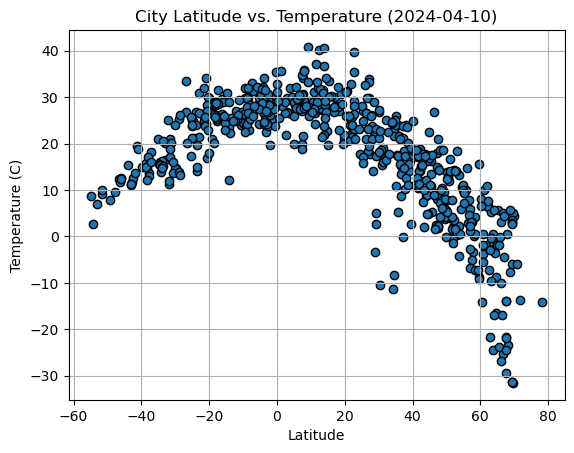

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["lat"], city_data_df["Max Temp"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Temperature (%s)" % time.strftime("%Y-%m-%d"))
plt.ylabel("Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)
          

# Save the figure
plt.savefig(r"C:\Users\Jeremy Morris\OneDrive\Desktop\OSU Data Analysis Course\Modules\Module 6\WeatherPy\Output\Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

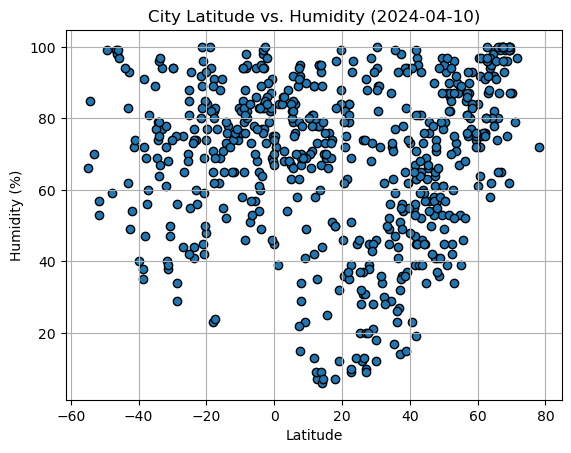

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["lat"], city_data_df["Humidity"], marker="o", edgecolors="black")


# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save the figure
plt.savefig(r"C:\Users\Jeremy Morris\OneDrive\Desktop\OSU Data Analysis Course\Modules\Module 6\WeatherPy\Output\Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

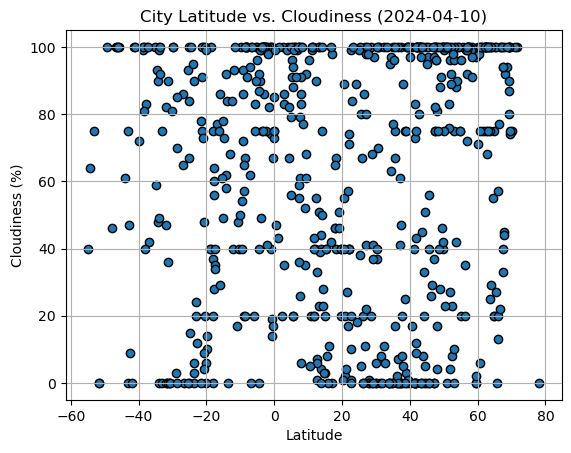

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["lat"], city_data_df["Cloudiness"], marker="o", edgecolors="black")


# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save the figure
plt.savefig(r"C:\Users\Jeremy Morris\OneDrive\Desktop\OSU Data Analysis Course\Modules\Module 6\WeatherPy\Output\Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

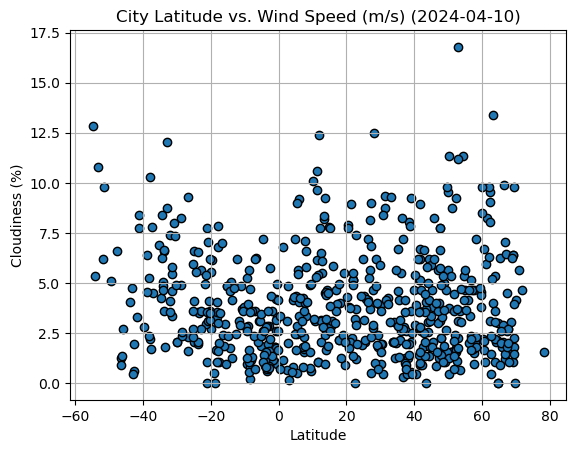

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["lat"], city_data_df["Wind Speed"], marker="o", edgecolors="black")


# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (m/s) (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save the figure
plt.savefig(r"C:\Users\Jeremy Morris\OneDrive\Desktop\OSU Data Analysis Course\Modules\Module 6\WeatherPy\Output\Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
#lat temp
#lat humidity
#lat cloudiness
#lat wind speed

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,lat,lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,tura,25.5198,90.2201,24.91,28,80,2.02,IN,1712766616
3,anadyr,64.7500,177.4833,-8.72,92,75,3.00,RU,1712766616
5,yellowknife,62.4560,-114.3525,-1.71,80,75,3.09,CA,1712766553
6,changuinola,9.4333,-82.5167,26.03,90,92,0.61,PA,1712766616
8,malmyzh,56.5205,50.6818,7.78,85,99,3.36,RU,1712766617


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['lat'] <= 0]


# Display sample data
southern_hemi_df.head()

,City,lat,lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto natales,-51.7236,-72.4875,9.25,57,0,6.17,CL,1712766464
1,la serena,-29.9078,-71.2542,14.73,94,100,2.06,CL,1712766453
4,papatowai,-46.5619,169.4708,12.39,99,100,1.27,NZ,1712766616
7,adamstown,-25.0660,-130.1015,23.74,81,100,4.08,PN,1712766617
14,grytviken,-54.2811,-36.5092,2.60,85,64,5.34,GS,1712766617


###  Temperature vs. Latitude Linear Regression Plot

the r-value is  -0.8380629541552606


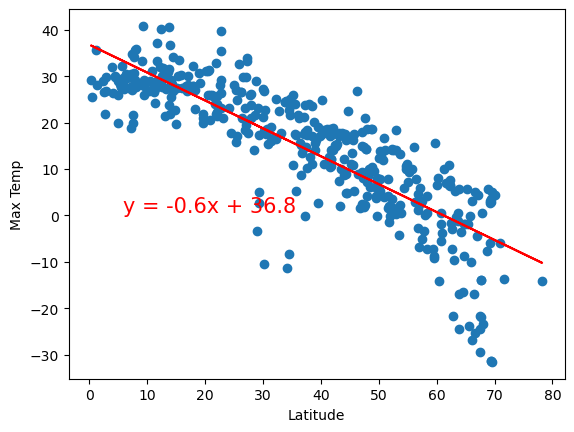

In [15]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['lat']
y_values = northern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
temp_lat_north_regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"the r-value is  {rvalue}")
plt.scatter(x_values,y_values)
plt.plot(x_values,temp_lat_north_regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()


the r-value is  0.8127320708149227


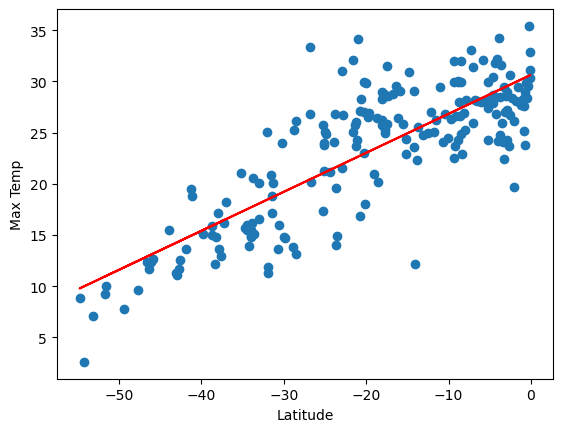

In [16]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['lat']
y_values = southern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
temp_lat_south_regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"the r-value is  {rvalue}")
plt.scatter(x_values,y_values)
plt.plot(x_values,temp_lat_south_regress_values,"r-")
plt.annotate(line_eq,(-35,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()

**Discussion about the linear relationship:**  In In the northern hemisphere, max temperature decreases as latitude increases or the max temp decreases the further away from the equator a place is. In the southern hemisphere, max temperatues increased as latitude creases or that was temperatures were higher the closer they are to the equator. In conclusion, places closer in latitude to the equator had higher max temperatures and places with further away in latitude to the equator had lower max temperatures on average.  

### Humidity vs. Latitude Linear Regression Plot

the r-value is  0.27897660896757687


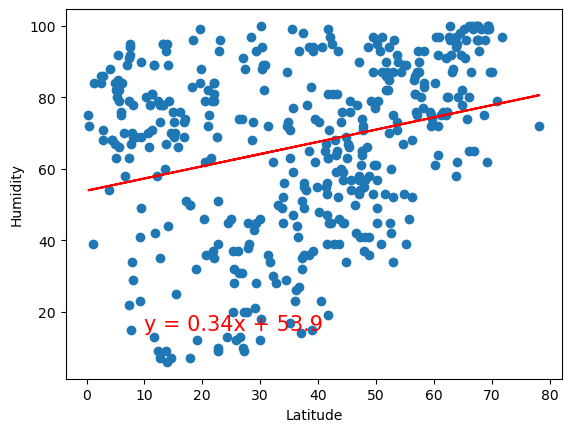

In [17]:
# Northern Hemisphere
x_values = northern_hemi_df['lat']
y_values = northern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
humidity_lat_north_regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"the r-value is  {rvalue}")
plt.scatter(x_values,y_values)
plt.plot(x_values,humidity_lat_north_regress_values,"r-")
plt.annotate(line_eq,(10,15),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()


the r-value is  0.14308724776741147


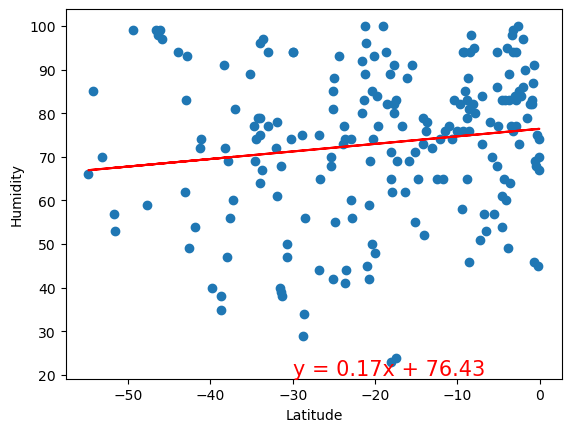

In [18]:
# Southern Hemisphere
x_values = southern_hemi_df['lat']
y_values = southern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
humidity_lat_south_regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"the r-value is  {rvalue}")
plt.scatter(x_values,y_values)
plt.plot(x_values,humidity_lat_south_regress_values,"r-")
plt.annotate(line_eq,(-30,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

**Discussion about the linear relationship:** Average humidity tends to increase as latitude increase. The rvalue is 0.28 for the northern hemisphere and 0.158 for the southern indicating that both interpretations are weak but only a little bit stronger in the northernhemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

the r-value is  0.15947094594418304


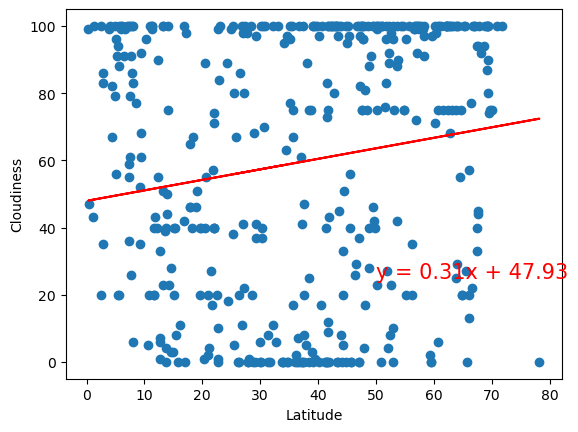

In [19]:
# Northern Hemisphere
x_values = northern_hemi_df['lat']
y_values = northern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
cloudiness_lat_north_regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"the r-value is  {rvalue}")
plt.scatter(x_values,y_values)
plt.plot(x_values,cloudiness_lat_north_regress_values,"r-")
plt.annotate(line_eq,(50,25),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

the r-value is  0.17331888889979136


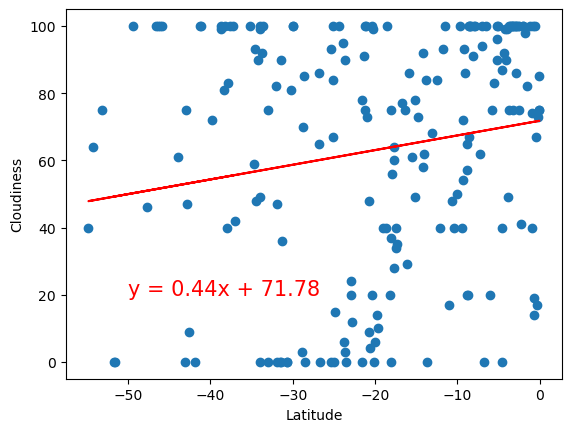

In [20]:
# Southern Hemisphere
x_values = southern_hemi_df['lat']
y_values = southern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
cloudiness_lat_north_regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"the r-value is  {rvalue}")
plt.scatter(x_values,y_values)
plt.plot(x_values,cloudiness_lat_north_regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

**Discussion about the linear relationship:** Cloudiness increases as latitude increaes in both the northern & southern hemispheres. Given the rvalue for the northern and southern hemispheres regarding cloudiness and latitude are both under 0.2, we can interpret that the interpretation is very weak. 

### Wind Speed vs. Latitude Linear Regression Plot

the r-value is  -0.01508404397977799


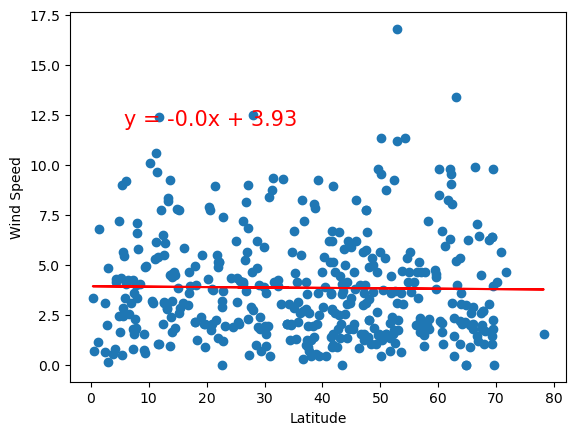

In [21]:
# Northern Hemisphere
x_values = northern_hemi_df['lat']
y_values = northern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
wind_lat_north_regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"the r-value is  {rvalue}")
plt.scatter(x_values,y_values)
plt.plot(x_values,wind_lat_north_regress_values,"r-")
plt.annotate(line_eq,(5.8,12),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

the r-value is  -0.44380319554749015


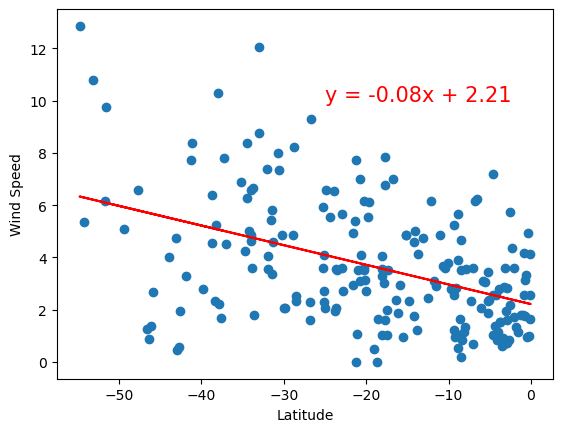

In [22]:
# Southern Hemisphere
x_values = southern_hemi_df['lat']
y_values = southern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
wind_lat_south_regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"the r-value is  {rvalue}")
plt.scatter(x_values,y_values)
plt.plot(x_values,wind_lat_south_regress_values,"r-")
plt.annotate(line_eq,(-25,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

**Discussion about the linear relationship:** There is no correlation between wind speed and latitude in the northern hemisphere given that the slope of the regression line is 0.0x althought the rvalue is 0.02 so this interpretation analysis is very weak. Although in the southern hemisphere as latitude increases, there is only a slight decrease in average wind speed since the slope of the regression line is -0.06x but the rvalue is -0.33 so it weakly negative. 